## Virulance HMM Table Analysis

In [1]:
from Bio import SearchIO
import pandas as pd
num_hit = 0
#now parse the output
hit_list = []
hit_ids = []
with open('hmm_table.txt', 'r') as input:
    for qresult in SearchIO.parse(input, 'hmmer3-text'):
        query_id = qresult.id  #sequence ID from fasta
        query_len = qresult.seq_len
        hits = qresult.hits
        hit_ids = hit_ids+qresult.hit_keys
        hit_list.append(hits)
        num_hits = len(hits)
        num_hit = num_hit + num_hits
print(num_hit)

/Users/stronglab2/anaconda2/lib/python2.7/site-packages/Bio/SearchIO/__init__.py:211: BiopythonExperimentalWarning: Bio.SearchIO is an experimental submodule which may undergo significant changes prior to its future official release.
  BiopythonExperimentalWarning)


19786


### Exploring Hit Table

In [3]:
len(hit_ids)

19786

In [2]:
#df = pd.read_table("hmm_table_test.txt")

In [2]:
uniq_hits = list(set(hit_ids))
len(uniq_hits)

15389

### Count of Viral Species in Uniprot Database

In [3]:
from Bio import SeqIO
ids = []
names = []

for seq_record in SeqIO.parse("viral.1.protein.faa", "fasta"):
    ids.append(seq_record.id)
    names.append(seq_record.description)
    

In [4]:
viral_names = [x.split('[', 1)[1].split(']')[0] for x in names]

In [15]:
len(viral_names)
viral_names[1:10]

['Paenibacillus phage phiIBB_Pl23',
 'Paenibacillus phage phiIBB_Pl23',
 'Paenibacillus phage phiIBB_Pl23',
 'Paenibacillus phage phiIBB_Pl23',
 'Paenibacillus phage phiIBB_Pl23',
 'Paenibacillus phage phiIBB_Pl23',
 'Paenibacillus phage phiIBB_Pl23',
 'Paenibacillus phage phiIBB_Pl23',
 'Paenibacillus phage phiIBB_Pl23']

In [22]:
from collections import Counter

freq = Counter(viral_names)


In [21]:
#number of unique viral 
virnum = list(set(viral_names))
len(virnum)

6580

In [5]:
df = pd.DataFrame({'IDs': ids, 
                   'Viral Names': viral_names, 
                   'CompleteRecord': names}, columns=['IDs','Viral Names', 'Complete Record'])
y = df['Viral Names'].str.contains('phage')
df=df[y]

In [6]:
df.head()

,IDs,Viral Names,Complete Record
0,YP_008320337.1,Paenibacillus phage phiIBB_Pl23,NaN
1,YP_008320338.1,Paenibacillus phage phiIBB_Pl23,NaN
2,YP_008320339.1,Paenibacillus phage phiIBB_Pl23,NaN
3,YP_008320340.1,Paenibacillus phage phiIBB_Pl23,NaN
4,YP_008320341.1,Paenibacillus phage phiIBB_Pl23,NaN


### Add Hit by Protein ID 

In [7]:
df['Virulence'] = [1 if x in uniq_hits else 0 for x in df['IDs']]

In [128]:
#import pickle
#pickle.dump(df, open('Virulance_Dataframe.p', 'wb'))

In [8]:
df.head()

,IDs,Viral Names,Complete Record,Virulence
0,YP_008320337.1,Paenibacillus phage phiIBB_Pl23,NaN,0
1,YP_008320338.1,Paenibacillus phage phiIBB_Pl23,NaN,0
2,YP_008320339.1,Paenibacillus phage phiIBB_Pl23,NaN,0
3,YP_008320340.1,Paenibacillus phage phiIBB_Pl23,NaN,0
4,YP_008320341.1,Paenibacillus phage phiIBB_Pl23,NaN,0


In [9]:
## Group by
test2 = df.groupby('Viral Names').sum()
test3 = df.groupby('Viral Names').count()
Gene_Count = list(test3['Virulence'])

In [10]:
test2['Gene_Count'] = Gene_Count

test2.head()

,Virulence,Gene_Count
Viral Names,,
Acholeplasma phage MV-L1,0,4
Achromobacter phage 83-24,3,61
Achromobacter phage JWAlpha,3,91
Achromobacter phage JWF,9,118
Achromobacter phage JWX,3,67


### Filter Viral Names by Phages

In [11]:
test2['VF_By_Count'] = list(map(lambda x,y: (x/float(y))*(100), test2['Virulence'],test2['Gene_Count']))
test2.head()

,Virulence,Gene_Count,VF_By_Count
Viral Names,,,
Acholeplasma phage MV-L1,0,4,0.000000
Achromobacter phage 83-24,3,61,4.918033
Achromobacter phage JWAlpha,3,91,3.296703
Achromobacter phage JWF,9,118,7.627119
Achromobacter phage JWX,3,67,4.477612


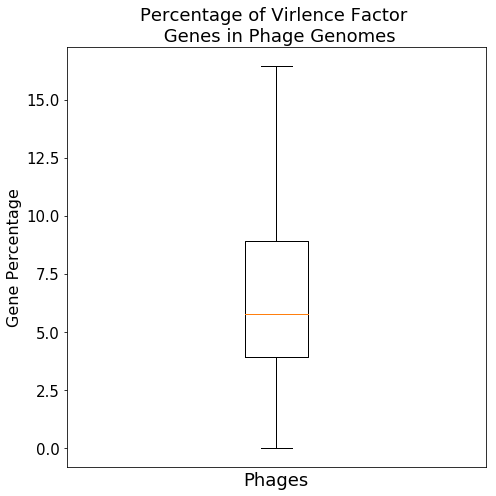

In [39]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
items = test2.VF_By_Count
plt.figure(figsize=(7, 7))
plt.boxplot(items, sym='')
plt.xticks([])
plt.rc('ytick', labelsize=10)
plt.title('Percentage of Virlence Factor \n Genes in Phage Genomes', fontsize=18)
plt.xlabel('Phages', fontsize=18)
plt.ylabel('Gene Percentage', fontsize=16)
plt.tight_layout()
plt.savefig('All_Phages_Percentage.jpg', transparent=True)

#### Misc Discritizing

In [12]:
zeros_in_test = test[test.Virulence == 0]
low_count = test[(test.Virulence >= 1) & (test.Virulence <= 10)]
tens_count = test[(test.Virulence > 10) & (test.Virulence <= 100)]

In [15]:
len(zeros_in_test)

84

In [13]:
len(low_count)

1147

In [14]:
len(tens_count)

279

#### Continued

In [40]:
## Group by Bacterial Genus
genus_name = test2.index
demo2 = [x.split(' ',1)[0] for x in genus_name]

In [87]:
len(demo2)

1510

In [41]:
test2['Genus'] = demo2

In [42]:
test2.head()

,Virulence,Gene_Count,VF_By_Count,Genus
Viral Names,,,,
Acholeplasma phage MV-L1,0,4,0.000000,Acholeplasma
Achromobacter phage 83-24,3,61,4.918033,Achromobacter
Achromobacter phage JWAlpha,3,91,3.296703,Achromobacter
Achromobacter phage JWF,9,118,7.627119,Achromobacter
Achromobacter phage JWX,3,67,4.477612,Achromobacter


In [43]:
test2 = test2.drop(['Virulence', 'Gene_Count'], axis=1)

In [44]:
Virulence_Avg = test2.groupby('Genus').mean()
Virulence_Avg = Virulence_Avg.sort_values(by=['VF_By_Count'], ascending=False)
Virulence_Avg.columns = ['Avg Number of Virulent Matches']
Virulence_Avg.head()

,Avg Number of Virulent Matches
Genus,
Mycoplasma,56.666667
Thermoanaerobacterium,19.298246
Sodalis,19.148936
Brevibacillus,16.334109
Oenococcus,14.964903


In [45]:
Number_of_phages = test2.groupby('Genus').count()
Number_of_phages = Number_of_phages.sort_values(by=['VF_By_Count'], ascending=False)
Number_of_phages.columns = ['Number of Phages in Genus']
Number_of_phages.head()

,Number of Phages in Genus
Genus,
Mycobacterium,249
Pseudomonas,112
Escherichia,92
Bacillus,82
Salmonella,67


In [46]:
### Number of Viruses over 30 in Genus
x = Number_of_phages[Number_of_phages['Number of Phages in Genus']>=30]
abundant = list(x.index)

In [47]:
len(test2)

1510

In [48]:
test3 = test2[test2['Genus'].isin(abundant)]
len(test3)

969

In [49]:
genera = test3.groupby('Genus').median()
genera = genera.sort_values(by=['VF_By_Count'], ascending=False)
order_med = list(genera.index)

In [50]:
abundant_phages = x.index
Abundant_df = Virulence_Avg[(Virulence_Avg.index).isin(abundant_phages)]
Abundant_df
order_ab = list(Abundant_df.index)
Abundant_df

,Avg Number of Virulent Matches
Genus,
Lactobacillus,14.816337
Streptococcus,13.366515
Staphylococcus,12.632024
Bacillus,9.948788
Lactococcus,7.928499
Enterobacteria,7.858452
Vibrio,7.681407
Salmonella,7.000089
Propionibacterium,5.735978


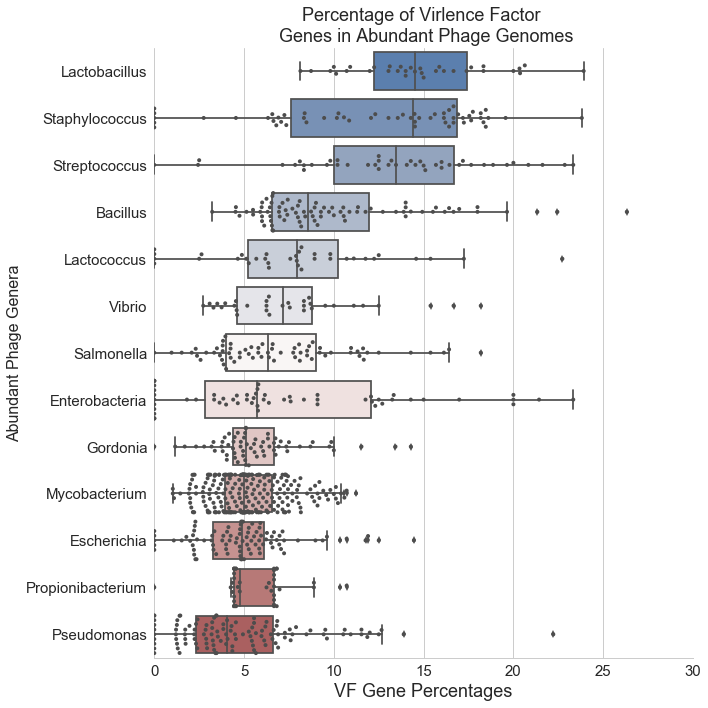

In [82]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



sns.set(style="whitegrid")
f = plt.subplots(figsize=(10, 10))


sns.boxplot(x="VF_By_Count", y="Genus", data=test3,
                whis=1.5, palette="vlag", order=order_med)


# Add in points to show each observation
sns.swarmplot(x="VF_By_Count", y="Genus", data=test3,size=4, color=".3", linewidth=0, order=order_med)


axes = plt.gca()
axes.set_xlim([0,30])
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Percentage of Virlence Factor \n Genes in Abundant Phage Genomes', fontsize=18)
plt.xlabel('VF Gene Percentages', fontsize=18)
plt.ylabel('Abundant Phage Genera', fontsize=16)
plt.tight_layout()

sns.despine(trim=True, left=True)
plt.savefig('Top_Phages_Percentage_50.jpg', transparent=True)

In [100]:
from scipy import stats
## Bacilus Distribution
bacillus_disto = test2[test2['Genus']=='Bacillus']
l = list(bacillus_disto['VF_By_Count'])
q = stats.shapiro(l)
print("Shaprio-Wilks Test of Normality of Bacillus Virulent Genes p-value = %s" % q[1])
## Staphylococcus Distribution
Staphylococcus_disto = test2[test2['Genus']=='Staphylococcus']
y = list(Staphylococcus_disto['VF_By_Count'])
q = stats.shapiro(y)
print("Shaprio-Wilks Test of Normality of Staphylococcus Virulent Genes p-value = %s" % q[1])
## Lactobacillus Distribution
Lactobacillus_disto = test2[test2['Genus']=='Lactobacillus']
y = list(Lactobacillus_disto['VF_By_Count'])
q = stats.shapiro(y)
print("Shaprio-Wilks Test of Normality of Lactobacillus Virulent Genes p-value = %s" % q[1])
## Escherichia Distribution
Escherichia_disto = test2[test2['Genus']=='Escherichia']
y = list(Escherichia_disto['VF_By_Count'])
q = stats.shapiro(y)
print("Shaprio-Wilks Test of Normality of Escherichia Virulent Genes p-value = %s" % q[1])
## Streptococcus Distribution
Streptococcus_disto = test2[test2['Genus']=='Streptococcus']
y = list(Streptococcus_disto['VF_By_Count'])
q = stats.shapiro(y)
print("Shaprio-Wilks Test of Normality of Streptococcus Virulent Genes p-value = %s" % q[1])
## Salmonella Distribution
Salmonella_disto = test2[test2['Genus']=='Salmonella']
y = list(Salmonella_disto['VF_By_Count'])
q = stats.shapiro(y)
print("Shaprio-Wilks Test of Normality of Salmonella Virulent Genes p-value = %s" % q[1])
## Enterobacteria Distribution
Enterobacteria_disto = test2[test2['Genus']=='Enterobacteria']
y = list(Enterobacteria_disto['VF_By_Count'])
q = stats.shapiro(y)
print("Shaprio-Wilks Test of Normality of Enterobacteria Virulent Genes p-value = %s" % q[1])
## Mycobacterium Distribution
Mycobacterium_disto = test2[test2['Genus']=='Mycobacterium']
y = list(Mycobacterium_disto['VF_By_Count'])
q = stats.shapiro(y)
print("Shaprio-Wilks Test of Normality of Mycobacterium Virulent Genes p-value = %s" % q[1])
## Vibrio Distribution
Vibrio_disto = test2[test2['Genus']=='Vibrio']
y = list(Vibrio_disto['VF_By_Count'])
q = stats.shapiro(y)
print("Shaprio-Wilks Test of Normality of Vibrio Virulent Genes p-value = %s" % q[1])
## Gordonia Distribution
Gordonia_disto = test2[test2['Genus']=='Gordonia']
y = list(Gordonia_disto['VF_By_Count'])
q = stats.shapiro(y)
print("Shaprio-Wilks Test of Normality of Gordonia Virulent Genes p-value = %s" % q[1])
## Lactococcus Distribution
Lactococcus_disto = test2[test2['Genus']=='Lactococcus']
y = list(Lactococcus_disto['VF_By_Count'])
q = stats.shapiro(y)
print("Shaprio-Wilks Test of Normality of Lactococcus Virulent Genes p-value = %s" % q[1])
## Pseudomonas Distribution
Pseudomonas_disto = test2[test2['Genus']=='Pseudomonas']
t = list(Pseudomonas_disto['VF_By_Count'])
q = stats.shapiro(t)
print("Shaprio-Wilks Test of Normality of Pseudomonas Virulent Genes p-value = %s" % q[1])
## Propionibacterium Distribution
Propionibacterium_disto = test2[test2['Genus']=='Propionibacterium']
y = list(Propionibacterium_disto['VF_By_Count'])
q = stats.shapiro(y)
print("Shaprio-Wilks Test of Normality of Propionibacterium Virulent Genes p-value = %s" % q[1])

Shaprio-Wilks Test of Normality of Bacillus Virulent Genes p-value = 2.15159934669e-06
Shaprio-Wilks Test of Normality of Staphylococcus Virulent Genes p-value = 0.00137221289333
Shaprio-Wilks Test of Normality of Lactobacillus Virulent Genes p-value = 0.765015006065
Shaprio-Wilks Test of Normality of Escherichia Virulent Genes p-value = 0.000526050454937
Shaprio-Wilks Test of Normality of Streptococcus Virulent Genes p-value = 0.677013516426
Shaprio-Wilks Test of Normality of Salmonella Virulent Genes p-value = 0.00818017590791
Shaprio-Wilks Test of Normality of Enterobacteria Virulent Genes p-value = 5.35688080561e-08
Shaprio-Wilks Test of Normality of Mycobacterium Virulent Genes p-value = 0.00030387940933
Shaprio-Wilks Test of Normality of Vibrio Virulent Genes p-value = 0.0078563913703
Shaprio-Wilks Test of Normality of Gordonia Virulent Genes p-value = 0.000471107457997
Shaprio-Wilks Test of Normality of Lactococcus Virulent Genes p-value = 0.139323234558
Shaprio-Wilks Test of No

### Stats To-Do
Considering Normlizing counts between 0 and 1 then applying the same normalization to observation. Then performing a one sample t-test or outlier detection

In [97]:
import numpy as np
z = np.mean(y)
variance = np.var(y)
variance

1.0612730517549076

In [102]:
import numpy as np
z = np.mean(l)
variance = np.var(l)
variance
#z

43.998810232004764

In [78]:
qw = stats.ttest_1samp(y,3)
qw

Ttest_1sampResult(statistic=-2.2460728058830486, pvalue=0.030290382881324712)

In [88]:
# Calculate Sample Mean
def mean(x):
    return sum(x)/(len(x)*1.0) 

# Calculate Sample Standard Deviation
def sd(x):
    xb = sum(x)/(len(x)*1.0) 
    return (sum([(i-xb)**2 for i in x])/(len(x)-1))**(0.5) 

In [91]:
def one_sample_ttest(x,mu,alt='neq'):
    # Calculate t statistic and p-value.
    ttest_onesample = stats.ttest_1samp(x, mu)
    # Extract t-stat
    t = ttest_onesample[0]
    # Sample Size
    n = len(x)
    # Degress of Freedom
    df = n-1
    # Calculate Standard Error
    se = sd(x)/((n)**(0.5))
    # Calculate the correct p value if gt is selected
    if(alt == 'gt'):   
        # Correct p-value for one sided alt
        if(t>=0):
            p = (ttest_onesample[1])/(2.0)
        elif(t==0):
            p = 1-(ttest_onesample[1])/(2.0)
        if(t<=0):
            p = (ttest_onesample[1])/(2.0)
            
        hypothesis = "less than"
        # Calculate 95 percent conf limits
        ts = stats.t.ppf(.05, df)
        ul = mean(x)-se*ts
        ll = float("-inf")
    else:
        p = ttest_onesample[1]
        # Calculate 95 percent conf limits
        hypothesis = "not equal to"
        ts = stats.t.ppf(0.025, df)
        ll = mean(x)-se*ts
        ul = mean(x)+se*ts
        
    print "One Sample t-test:"
    print "t = %.4f," % t,"df = %.f," % df, "p-value = %.4f" % p 
    print "alternative hypothesis: true mean is", hypothesis , mu, "\n"
    print "95 percent confidence interval:"
    print "\t (%.4f," % ll , "%.4f)" % ul, "\n"

In [96]:
one_sample_ttest(y, 3, 'gt')

One Sample t-test:
t = -2.2461, df = 40, p-value = 0.0151
alternative hypothesis: true mean is less than 3 

95 percent confidence interval:
	 (-inf, 2.9084) 



In [101]:
stuff = 'Z1'
x = int(stuff, 16)
x

ValueError: invalid literal for int() with base 16: 'Z1'